<a href="https://colab.research.google.com/github/bosemessi/ML-Based-modelling-in-Soccer/blob/master/xgboost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Imports

In [ ]:
!pip install pdpbox
from pdpbox import pdp # pip install firs
!pip install scikit-plot
!pip install rfpimp
!pip install dtreeviz
!pip install catboost
import os;
import pandas as pd
import tqdm
import warnings
import numpy as np
from numpy.random import rand
from numpy.random import seed
warnings.simplefilter(action='ignore', category=pd.errors.PerformanceWarning)
import math
import time
import json
import requests
from pandas import json_normalize
import os
import csv
pd.options.mode.chained_assignment = None
import matplotlib.pyplot as plt
import scikitplot as skplt
import scipy  
from scipy.cluster import hierarchy as hc
from collections import defaultdict
from rfpimp import *
# Machine learning
from sklearn import preprocessing, model_selection, svm, metrics
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.utils import resample
from sklearn.feature_selection import RFE
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.utils.class_weight import compute_class_weight
from imblearn.over_sampling import SMOTENC
from sklearn.preprocessing import StandardScaler 
from sklearn.decomposition import PCA
from imblearn.under_sampling import TomekLinks
from imblearn.under_sampling import EditedNearestNeighbours
from imblearn.combine import SMOTETomek
from imblearn.combine import SMOTEENN
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import brier_score_loss
from sklearn.calibration import CalibratedClassifierCV, calibration_curve
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn import preprocessing, model_selection, metrics
from sklearn.model_selection import StratifiedKFold, train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import make_scorer, brier_score_loss
from sklearn.calibration import CalibratedClassifierCV
import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerLine2D
from collections import OrderedDict
from imblearn.under_sampling import TomekLinks
from dtreeviz.trees import *
# Then run the code below if you get an error telling you that graphviz isn't in your system path (Windows users)
# https://stackoverflow.com/a/44625895
your_graphviz_install_directory = 'C:/Users/bosem/anaconda3/Library/bin/graphviz'
os.environ["PATH"] += os.pathsep + your_graphviz_install_directory

     |████████████████████████████████| 57.7MB 71kB/s 
  Created wheel for pdpbox: filename=PDPbox-0.2.0-cp36-none-any.whl size=57690722 sha256=f83d8034b2aeee4495214d0975a94d36a32b20bb4d2853046859c843dd37b5b2
  Stored in directory: /root/.cache/pip/wheels/7d/08/51/63fd122b04a2c87d780464eeffb94867c75bd96a64d500a3fe
Successfully built pdpbox
  Created wheel for rfpimp: filename=rfpimp-1.3.6-cp36-none-any.whl size=10645 sha256=1d24cf0628714c0a5ef8eae14a500a1977d3496d6bd687aef4a98979545405bb
  Stored in directory: /root/.cache/pip/wheels/4d/dc/d3/cf941c8f72eb5f1864506a1a6ddd689729063798292e539522
Successfully built rfpimp
     |████████████████████████████████| 51kB 2.7MB/s 
     |████████████████████████████████| 204.2MB 70kB/s 
     |████████████████████████████████| 204kB 44.3MB/s 
  Created wheel for dtreeviz: filename=dtreeviz-1.1.3-cp36-none-any.whl size=52493 sha256=bab72fbf8b37724428b5d593340e1e2dce4946f16e3fc2994eb8199e8d1e4531
  Stored in directory: /root/.cache/pip/wheels/80/a9/

#Read file

In [ ]:
folder = os.getcwd()+'/drive/MyDrive/Shots201920/'
file = folder+'shots.csv'
shots = pd.read_csv(file)
shots['minute'] = shots['time_seconds']/60
shots['minper90'] = shots['minute']/90

#XGBoost

In [ ]:
import gc
_ = gc.collect()
features = ['minute','start_x','start_y','play_pattern', 'bodypart_id', 'gamestate', 'distance', 'sca',
            'angle','sc','through_ball','follows_cross', 'follows_pass',
        'follows_dribble', 'follows_take_on',
       'follows_corner', 'follows_freekick']
target = 'result_id'

X = shots[features]
y = shots[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, shuffle=True, stratify=y, random_state=42)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [ ]:
xgb = XGBClassifier(objective='binary:logistic', random_state=42, n_jobs=-1)
xgb.fit(X_train, y_train)
scores = cross_val_score(xgb, X_train, y_train, cv=cv, scoring='brier_score_loss')
print('Brier loss:', "{0:.5f}".format(np.mean(scores)*-1))

Brier loss: 0.07668


In [ ]:
scores = cross_val_score(xgb, X_train, y_train, cv=cv, scoring='brier_score_loss')
y_pred_proba_xgb = xgb.predict_proba(X_test)[:,1]
# Print results
print('Actual goals:', sum(y_test))
print('Predicted goals (xgb):', '{0:.2f}'.format(sum(y_pred_proba_xgb)))
print('Brier loss (xgb):', '{0:.5f}'.format(brier_score_loss(y_test, y_pred_proba_xgb)))
y_pred_xgb = xgb.predict(X_test)
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred_xgb), "\n")
print(metrics.classification_report(y_test, y_pred_xgb))

Actual goals: 1685
Predicted goals (xgb): 1646.28
Brier loss (xgb): 0.07655
accuracy: 0.9052906976744186 

              precision    recall  f1-score   support

           0       0.91      1.00      0.95     15515
           1       0.64      0.08      0.14      1685

    accuracy                           0.91     17200
   macro avg       0.77      0.54      0.54     17200
weighted avg       0.88      0.91      0.87     17200



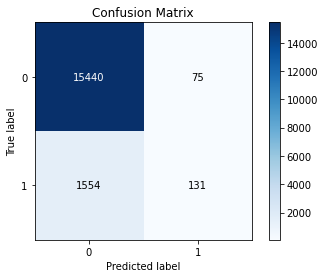

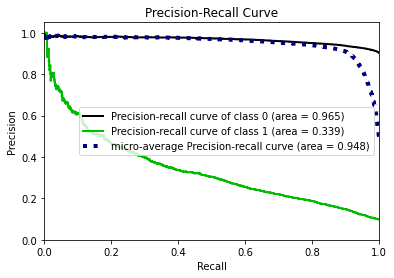

In [ ]:
skplt.metrics.plot_confusion_matrix(y_test, y_pred_xgb)
 
skplt.metrics.plot_precision_recall(y_test, xgb.predict_proba(X_test))

In [ ]:
from sklearn.metrics import roc_auc_score
predictions = xgb.predict(X_test)
print(f"Area under ROC curve: {roc_auc_score(predictions, y_test):.2f}")

Area under ROC curve: 0.76


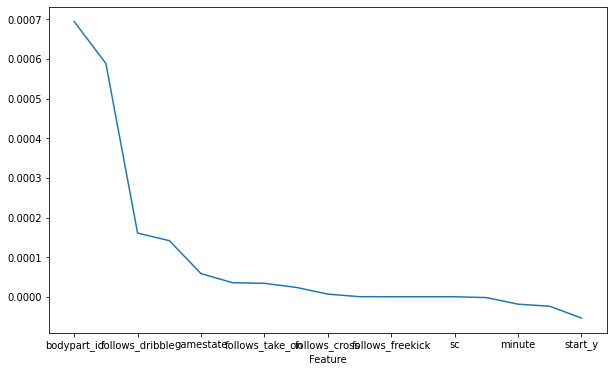

In [ ]:
# Define a function to calculate the Brier loss using cross-validation
def get_loss(X, y=y, m=xgb, cv=cv):
    scores = cross_val_score(m, X, y, cv=cv, scoring='brier_score_loss')
    return np.mean(scores)*-1
def get_imp(X, y=y, m=xgb, cv=cv):
    baseline = get_loss(X=X, y=y, m=m, cv=cv)
    imp = []
    for col in X.columns:
        s = get_loss(X=X.drop(col, axis=1), y=y, m=m, cv=cv)
        change_in_score = s - baseline
        imp.append(change_in_score)
    imp_df = pd.DataFrame(data={'Feature': X.columns, 'Importance': np.array(imp)})
    imp_df = imp_df.set_index('Feature').sort_values('Importance', ascending=False)
    return imp_df

imp1 = get_imp(X=X)
imp1.reset_index().plot('Feature', 'Importance', figsize=(10,6), legend=False);